In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import openmensa

In [2]:
pd.plotting.register_matplotlib_converters()
sns.set(style="darkgrid")

In [3]:
meals = openmensa.load_csvs("*.csv")
meals.sort_values("date").tail()

,mensa_id,date,meal_id,name,category,price_student,notes
27913,Philipps Bistro,2020-02-07,4894260,Vegetarische Frühlingsrolle mit Tomatensauce u...,Abendgericht vegetarisch,2.75,"['glutenhaltiges Getreide', 'mit Farbstoff', '..."
27914,Philipps Bistro,2020-02-07,4894261,Steinbeisser mit Sauce Hollandaise,Bistro Gourmet Fisch,4.85,"['glutenhaltiges Getreide', 'Soja', 'Eier', 'F..."
27915,Philipps Bistro,2020-02-07,4894262,Cordon bleu mit Schinken und Käse gefüllt dazu...,Bistro Gourmet Fleisch,4.60,"['mit Konservierungsstoff', 'mit Antioxidation..."
8587,Mensa Erlenring,2020-02-07,4893723,Zwei gebackene Hetaxkäse mit Joghurt-Dip,Menü II vegetarisch,3.35,"['Milch', 'glutenhaltiges Getreide', 'Eier']"
32080,Mo's Diner,2020-02-07,4893801,Zwei gebackene Hetaxkäse mit Joghurt-Dip,Menü II vegetarisch,3.45,"['Milch', 'glutenhaltiges Getreide', 'Eier']"


In [4]:
category_aliases = [
    ("Menü", "Menü 1"),
    ("Menü vegetarisch", "Menü 2 vegetarisch"),
    ("Vital Linie", "Vital-Linie"),
    ("Menü 3", "Vital-Linie"),
    ("Wochenhit/Pastateller", "Wochenhit"),
    ("Menü I", "Menü 1"),
    ("Menü II vegetarisch", "Menü 2 vegetarisch"),
    ("Menü III", "Menü 3")]

for old, new in category_aliases:
    meals.loc[meals["category"] == old, ["category"]] = new

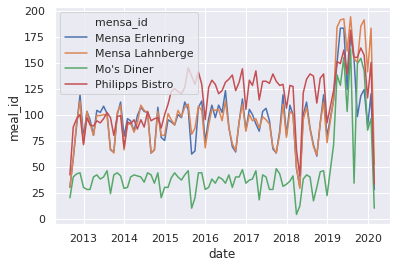

In [5]:
overview = meals.groupby(
    ["mensa_id", pd.Grouper(key="date", freq="M")]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview)

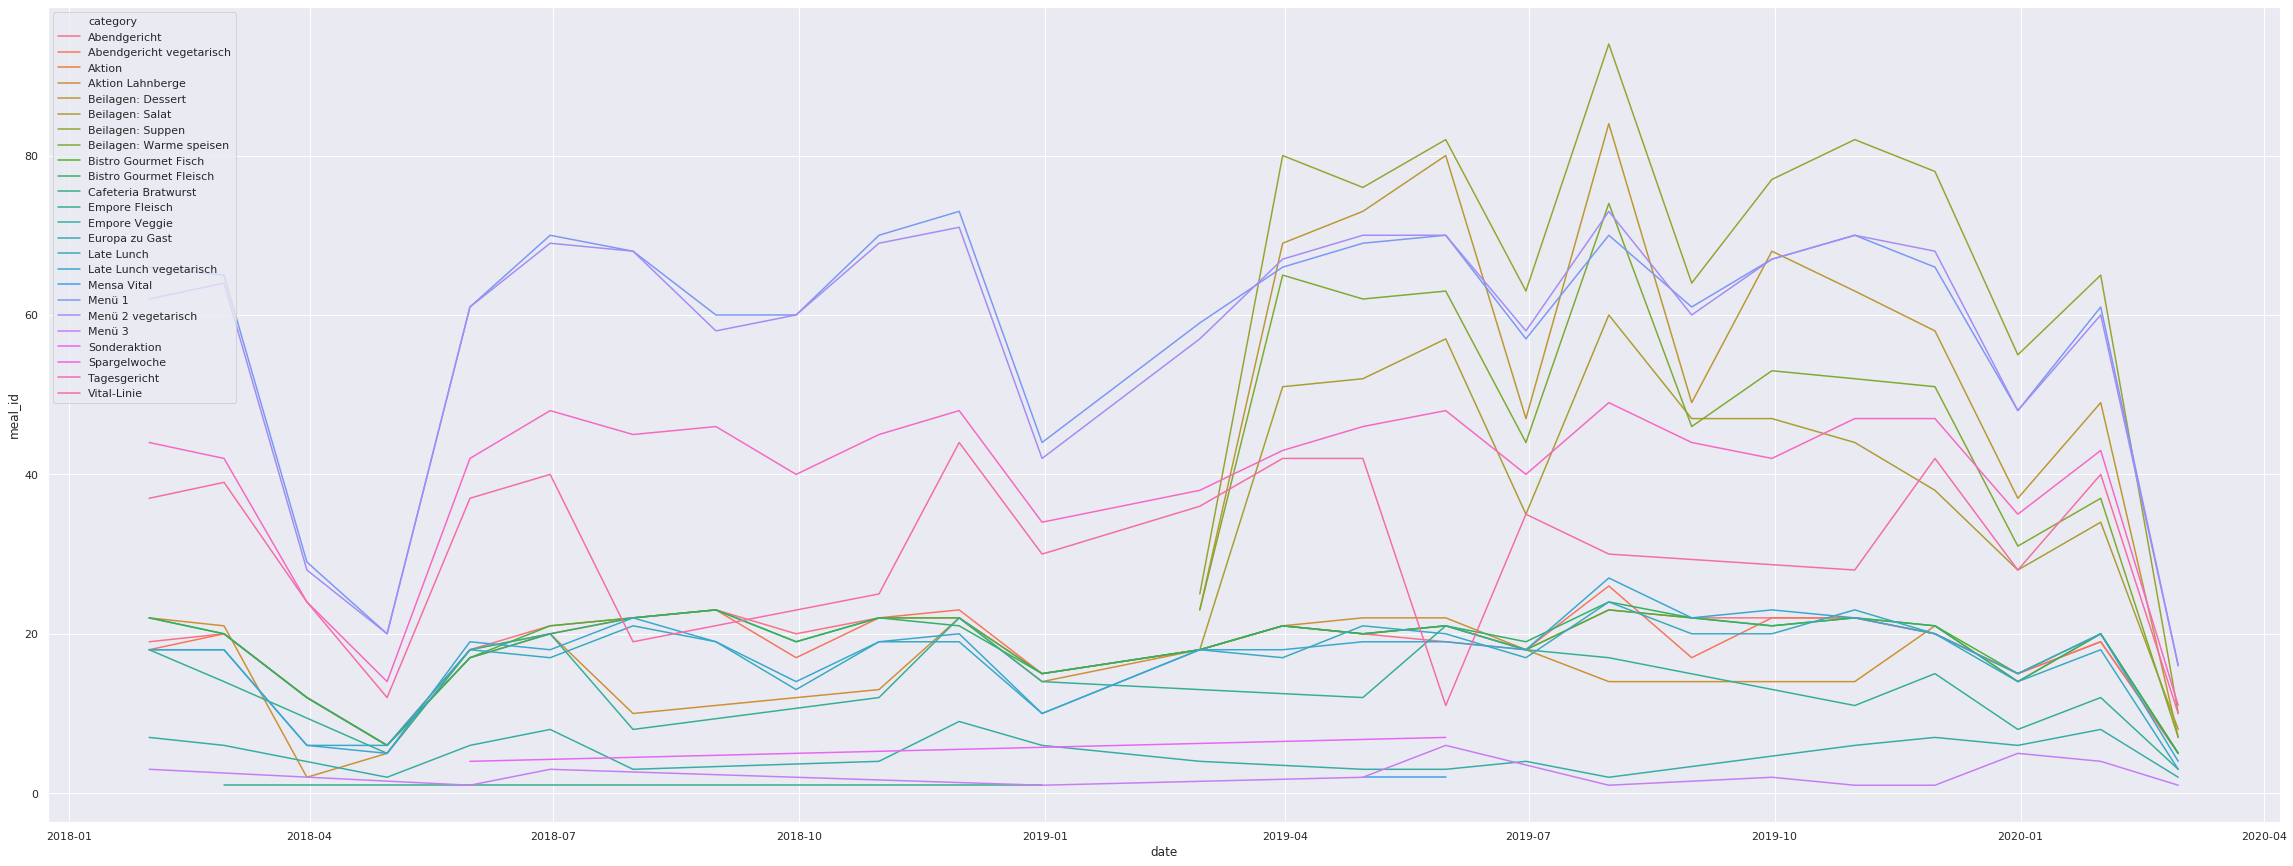

In [6]:
overview_cat = meals[meals.date >= "2018-01-01"].groupby(
    ["category", pd.Grouper(key="date", freq="1M")]).count()["meal_id"].reset_index()

plt.figure(figsize=(40, 15))
sns.lineplot(x="date", y="meal_id", hue="category", data=overview_cat)

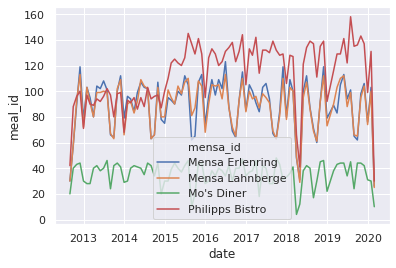

In [7]:
overview_side = meals[~meals.category.str.contains("Beilagen")].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="M")]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview_side)

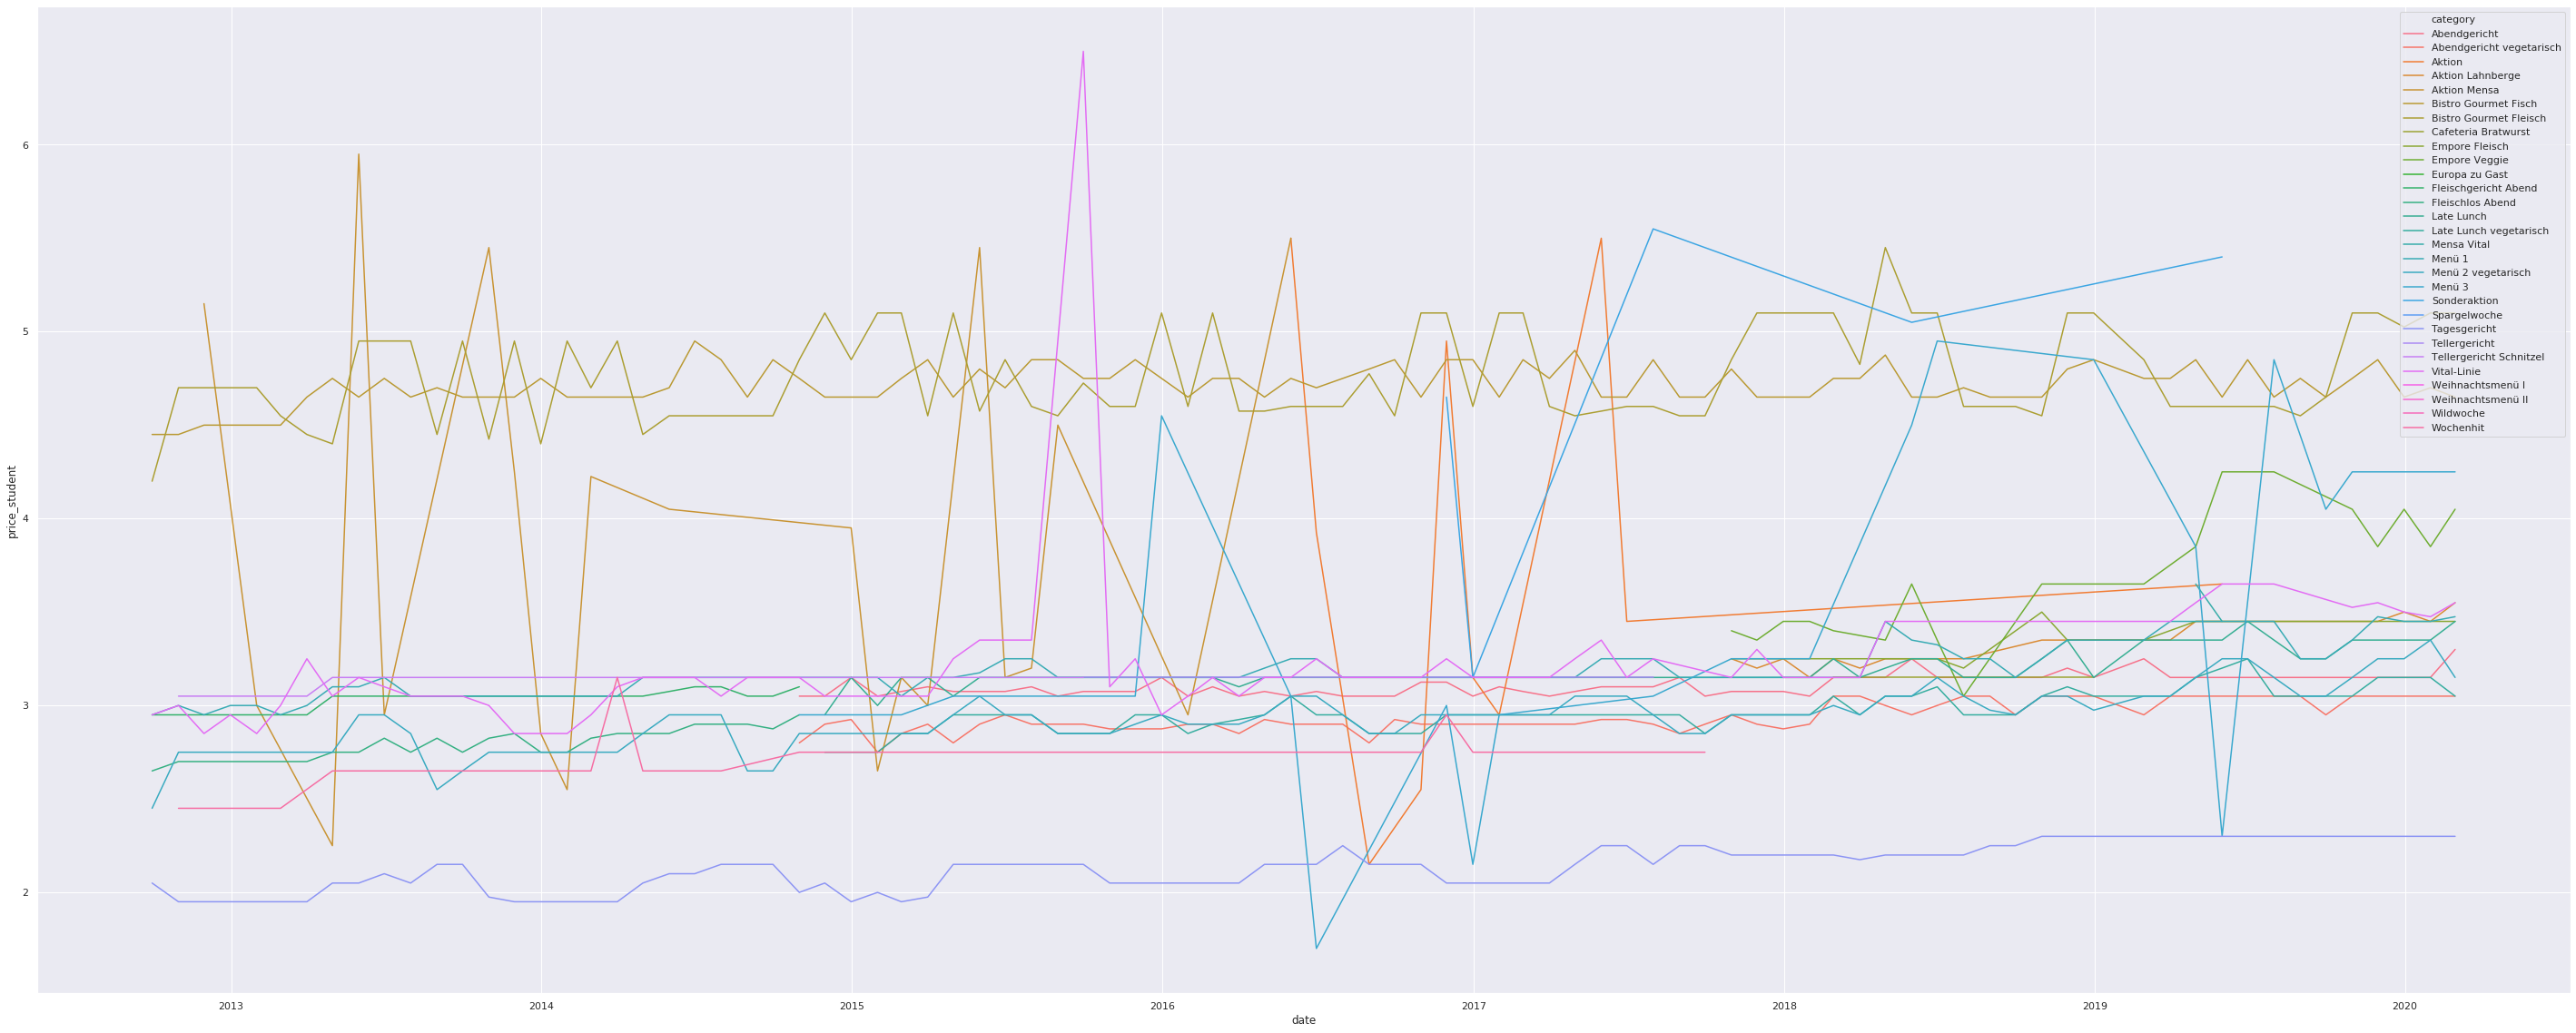

In [8]:
# ignore elements without a price and the golden Hetax-Käse for EUR 295
meals_cat = meals[~(meals.price_student.isnull()) & (meals.price_student < 10)].groupby(
    ["category", pd.Grouper(key="date", freq="M")])["price_student"].median().reset_index()

plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_student", hue="category", data=meals_cat)

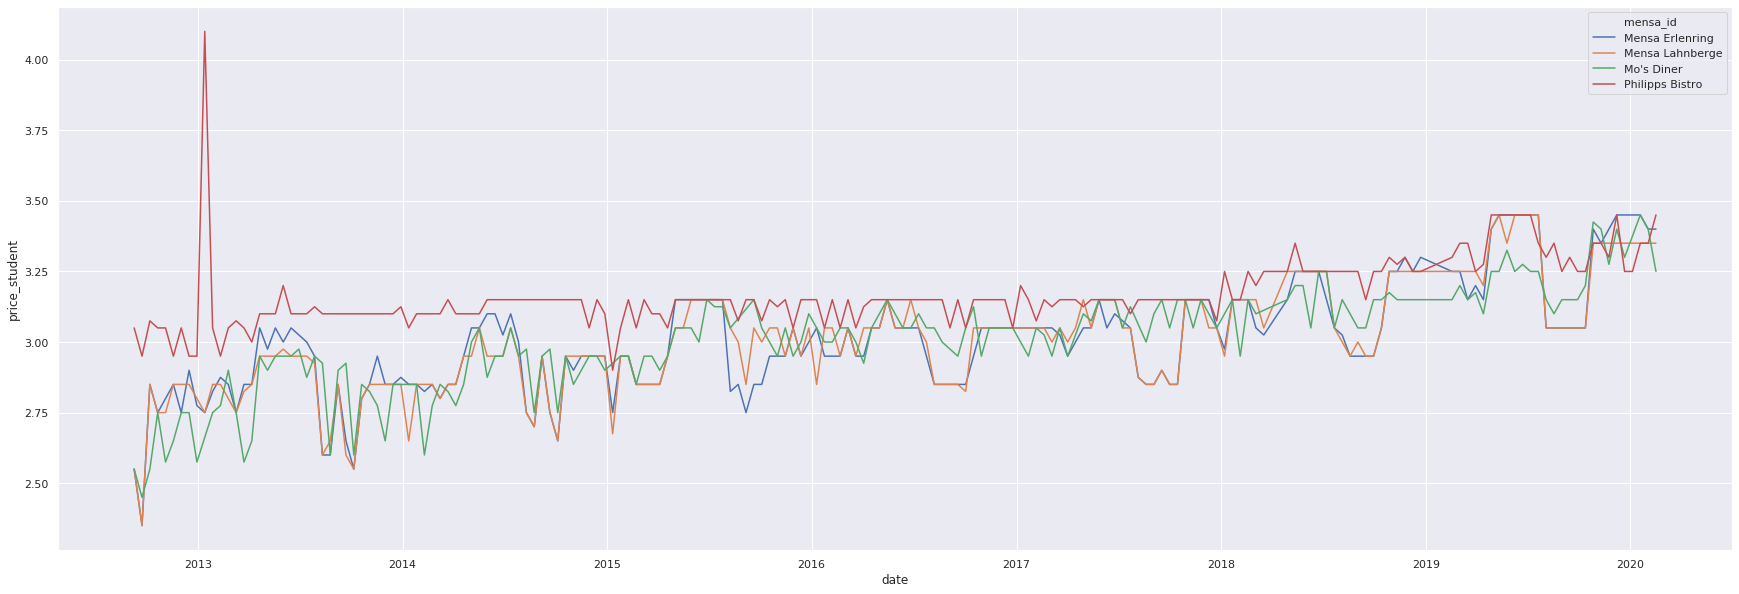

In [9]:
meals_mensa = meals[~(meals.price_student.isnull()) & (meals.price_student < 10)].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="2W")])["price_student"].median().reset_index()

plt.figure(figsize=(30, 10))
sns.lineplot(x="date", y="price_student", hue="mensa_id", data=meals_mensa)

In [10]:
meals_hot = meals.name.value_counts().to_frame().reset_index().rename(columns={"index":"name", "name":"count"})
meals_hot.head(20)

,name,count
0,Ananasquark,182
1,Gebackenes Schweineschnitzel mit Pommes frites...,171
2,Bratkartoffeln,170
3,Banane (Obst 1 Stück) -vegan,163
4,Gebackenes Seelachsfilet mit Remouladensauce,150
5,Schweineschnitzel mit Pommes-frites und gemisc...,129
6,Gebackenes Putenschnitzel mit Basilikumsauce,123
7,Brokkoli-Nußecke mit Tomatensauce,116
8,Pfannengyros mit Tzatziki,108
9,Herzhaftes Rindergulasch mit Pilzen,97


In [11]:
meals_hot.loc[meals_hot.name.str.contains("Schweineschnitzel")].head(20)

,name,count
1,Gebackenes Schweineschnitzel mit Pommes frites...,171
5,Schweineschnitzel mit Pommes-frites und gemisc...,129
11,Gebackenes Schweineschnitzel mit Pommes frites...,91
18,Gebackenes Schweineschnitzel mit Paprikasauce ...,67
21,Gebackenes Schweineschnitzel mit Pommes frites...,63
30,Gebackenes Schweineschnitzel mit Jägersauce un...,57
36,Gebackenes Schweineschnitzel mit Pommes frites...,55
38,Gebackenes Schweineschnitzel mit Pommes frites...,54
46,Gebackenes Schweineschnitzel mit Pommes frites...,50
59,Gebackenes Schweineschnitzel mit Pommes frites...,40


In [12]:
meals_hot.loc[meals_hot.name.str.contains("Schweineschnitzel")]["count"].sum()

1674

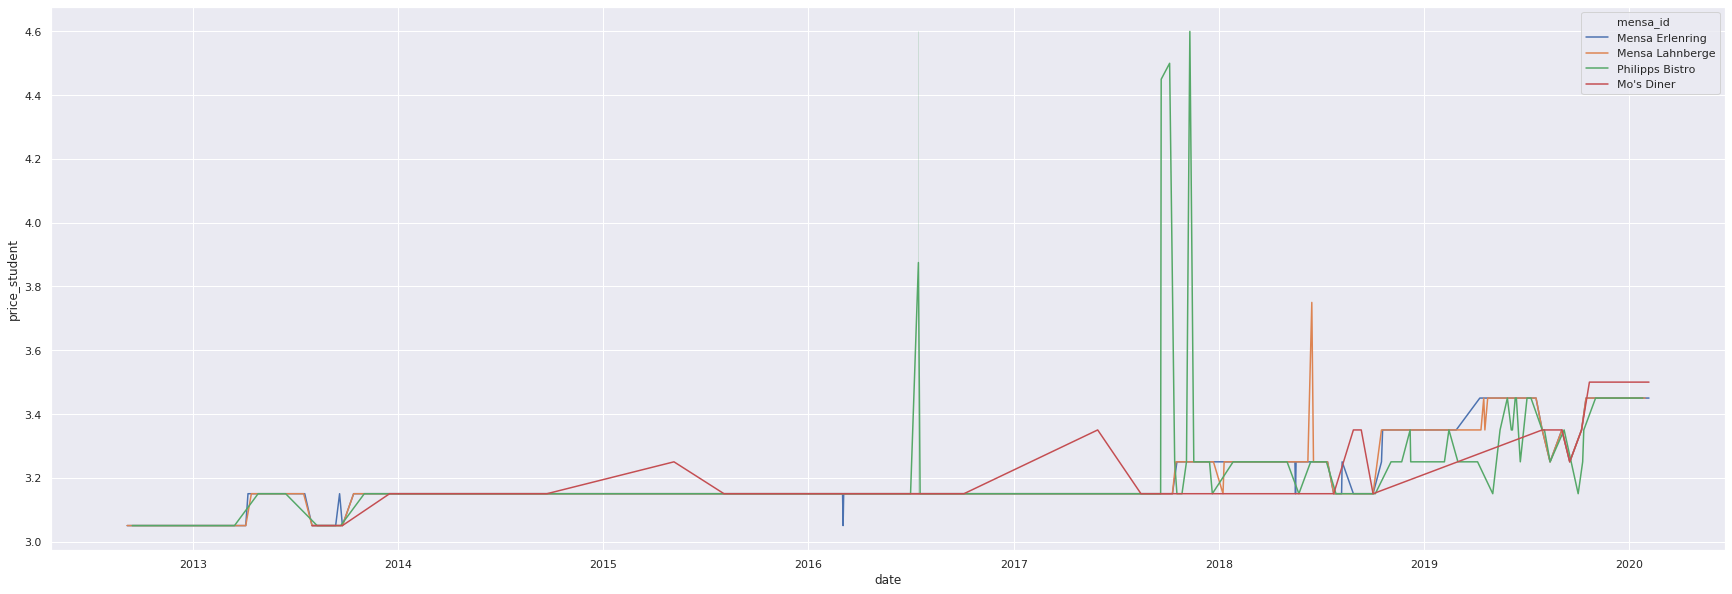

In [13]:
meals_schnitzel = meals[meals.name.str.contains("Schweineschnitzel")]

plt.figure(figsize=(30, 10))
sns.lineplot(x="date", y="price_student", hue="mensa_id", data=meals_schnitzel)

In [14]:
meals[(meals.name.str.contains("Schweineschnitzel")) & (meals.price_student > 4)]

,mensa_id,date,meal_id,name,category,price_student,notes
22457,Philipps Bistro,2016-07-15,2064652,"Gefülltes Schweineschnitzel ""Cordon bleu"" mit ...",Bistro Gourmet Fleisch,4.60,"['mit Konservierungsstoff', 'Milch', 'Soja', '..."
24299,Philipps Bistro,2017-09-20,2824515,Schweineschnitzel mit Käse und Schinken gefüll...,Bistro Gourmet Fleisch,4.45,"['Milch', 'Soja', 'Eier', 'glutenhaltiges Getr..."
24363,Philipps Bistro,2017-10-05,2851698,"Schweineschnitzel ""Mailänder Art"" mit Pfifferl...",Bistro Gourmet Fleisch,4.50,"['Sellerie', 'mit Konservierungsstoff', 'mit A..."
24516,Philipps Bistro,2017-11-10,2904397,Schweineschnitzel Cafè de Paris,Bistro Gourmet Fleisch,4.60,"['Sellerie', 'Milch', 'Eier', 'glutenhaltiges ..."


In [15]:
meals_hot.loc[meals_hot.name.str.lower().str.contains("vegan")].head(10)

,name,count
3,Banane (Obst 1 Stück) -vegan,163
22,Kürbis-Gemüseragout mit Vollkornreis -vegan,62
31,Asiatische Gemüse-Pilzpfanne mit Glasnudeln un...,56
34,Perlgraupen mit Austernpilzen und Bohnen-vegan-,55
42,Kichererbsen-Ananas-Spinat-Curry mit Kartoffel...,51
55,"Chili sin Carne, Bohnenchili mit Sojawürfeln-v...",42
64,Tomaten-Chili-Knoblauchspaghetti mit Tofu- vegan,38
86,"Gemüsepfanne mit Auberginen, Champignons und T...",33
146,Kürbisragout mit Vollkornreis und Rucola -vegan,24
150,Asiatische Gemüsepfanne mit Glasnudeln -vegan,24


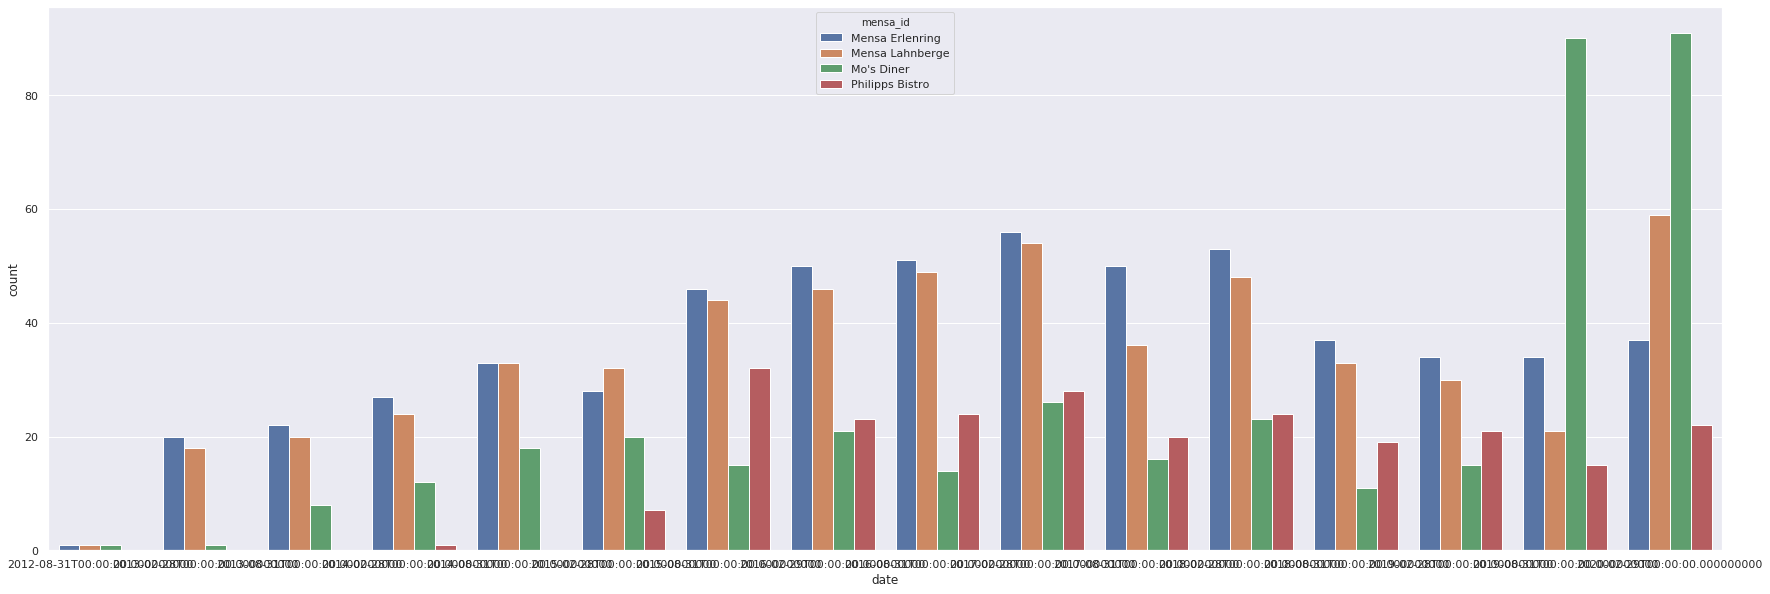

In [16]:
meals_vegan = meals[meals.name.str.lower().str.contains("vegan")][["mensa_id", "date", "name"]].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="6M")]).count().reset_index().rename(columns={"name":"count"})

plt.figure(figsize=(30, 10))
sns.barplot(x="date", y="count", hue="mensa_id", data=meals_vegan)

In [17]:
meals_vegan_mo = meals[
    (meals.name.str.lower().str.contains("vegan")) &
    (meals.mensa_id == "Mo's Diner") &
    (meals.date >= "2019-01-01")]
meals_vegan_mo.name.value_counts().to_frame().head()

,name
Banane (Obst 1 Stück) -vegan,158
"Veganer, hausgemachter Gemüseauflauf mit Nudeln",3
Asiatische Gemüsepfanne mit Glasnudeln -vegan,3
"Vegane Paprikapfanne mit Bulgur und Soja-Hack, dazu Tomaten-Soja-Dipp",3
Birne (Obst 1 Stück) -vegan,3


In [18]:
meals_price = meals[~meals.price_student.isnull()].groupby(["name", "date"]).filter(
    lambda m: len(m) > 1 and abs(m.price_student.std()) >= 0.5)
meals_price.sort_values("date").tail()

,mensa_id,date,meal_id,name,category,price_student,notes
27880,Philipps Bistro,2020-01-31,4896124,"Hähnchenstreifen ""Asia Style"" mit süß-saurem Dip",Late Lunch,3.05,"['mit Konservierungsstoff', 'Schwefeldioxid un..."
27879,Philipps Bistro,2020-01-31,4875013,"Hähnchenstreifen ""Asia Style"" mit süß-saurem Dip",Bistro Gourmet Fleisch,4.50,"['mit Konservierungsstoff', 'Schwefeldioxid un..."
17499,Mensa Lahnberge,2020-02-07,4893754,Hausgemachte Frikadelle mit Kartoffelpüree und...,Tagesgericht,2.30,"['Rind/Kalb', 'glutenhaltiges Getreide', 'mit ..."
8589,Mensa Erlenring,2020-02-07,4893725,Hausgemachte Frikadelle mit Kartoffelpüree und...,Tagesgericht,2.30,"['Rind/Kalb', 'glutenhaltiges Getreide', 'mit ..."
32079,Mo's Diner,2020-02-07,4893800,Hausgemachte Frikadelle mit Kartoffelpüree und...,Menü 1,3.25,"['Rind/Kalb', 'glutenhaltiges Getreide', 'mit ..."


In [19]:
meals_price.groupby(["name", "date"]).std().sort_values("price_student").tail(5)

,,meal_id,price_student
name,date,,
Zwei Nürnberger Rostbratwürstchen mit Kartoffelpüree und Sauerkraut mit Speck,2016-10-14,7607.761859,0.707107
"Kokosreis mit Kürbis, Karotten und Bohnen dazu Chilidipp",2014-05-07,6812.973837,0.707107
"Gegrillte Hähnchenkeule mit Tomatenjus, Pommes frites und Salat",2019-08-02,9411.776152,0.952628
"Hähnchenstreifen ""Asia Style"" mit süß-saurem Dip",2020-01-31,14927.731258,1.025305
Hirschbraten mit Pilzrahmsauce,2017-12-21,482.246825,1.626346


In [20]:
meals_price[meals_price.date == "2020-01-31"]

,mensa_id,date,meal_id,name,category,price_student,notes
27879,Philipps Bistro,2020-01-31,4875013,"Hähnchenstreifen ""Asia Style"" mit süß-saurem Dip",Bistro Gourmet Fleisch,4.50,"['mit Konservierungsstoff', 'Schwefeldioxid un..."
27880,Philipps Bistro,2020-01-31,4896124,"Hähnchenstreifen ""Asia Style"" mit süß-saurem Dip",Late Lunch,3.05,"['mit Konservierungsstoff', 'Schwefeldioxid un..."


<Figure size 2160x720 with 0 Axes>

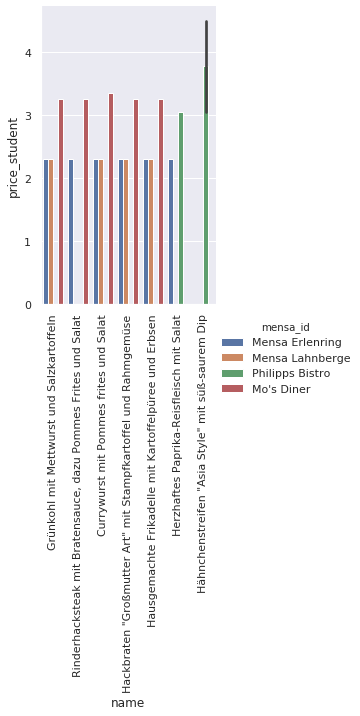

In [21]:
plt.figure(figsize=(30, 10))
p = sns.catplot(x="name", y="price_student", hue="mensa_id",kind="bar",
                data=meals_price[meals_price.date >= "2019-10-01"])
p.set_xticklabels(rotation=90)